In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

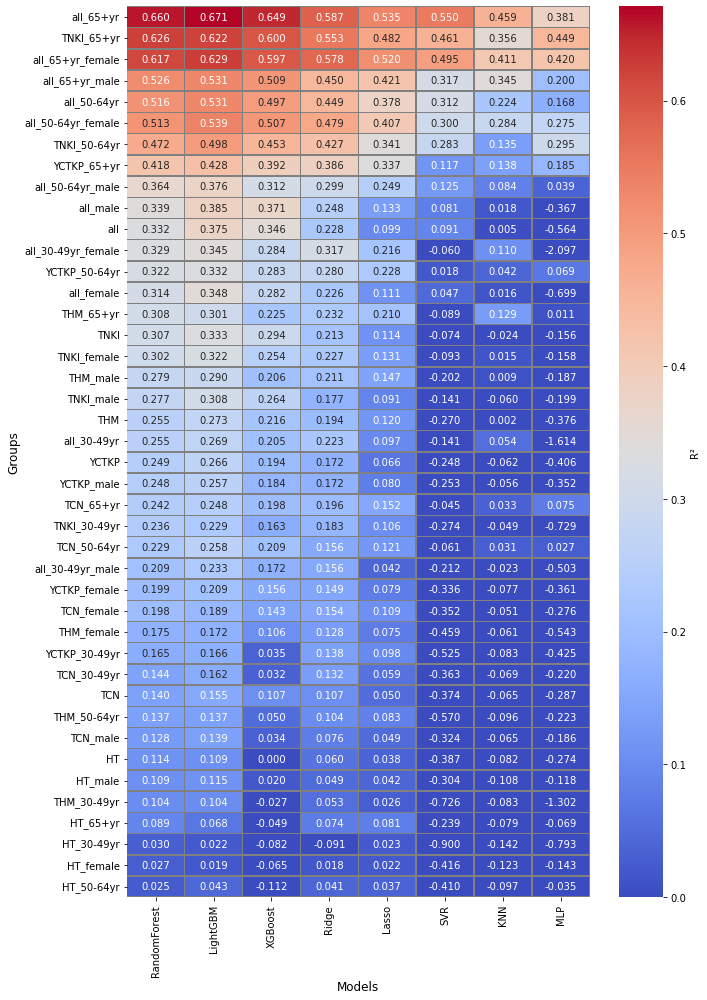

In [12]:
# 讀取6個CSV檔案
file_paths = [
    "RandomForest.csv",
    "LightGBM.csv",
    "XGBoost.csv",
    "Ridge.csv",
    "Lasso.csv",
    "SVR.csv",
    "KNN.csv",
    "MLP.csv"
]

# 模型名稱（可以修改為你的實際模型名稱）
model_names = ["RandomForest", "LightGBM", "XGBoost", "Ridge", "Lasso", "SVR", "KNN", "MLP"]

# 讀取所有檔案並合併
dfs = []
for i, file_path in enumerate(file_paths):
    df = pd.read_csv('./r_squares/'+file_path)
    df['model'] = model_names[i]
    dfs.append(df)

# 合併所有資料
all_data = pd.concat(dfs, ignore_index=True)

# 建立樞紐表：行是族群，列是模型
pivot_table = all_data.pivot(index='group', columns='model', values='r^2')

# 確保模型順序正確
pivot_table = pivot_table[model_names]

pivot_table = pivot_table.sort_values(by='RandomForest', ascending=False)

# 只遮罩缺失值
mask = pivot_table.isna()

plt.figure(figsize=(10, 14))
sns.heatmap(pivot_table, 
            mask=mask,  
            cmap='coolwarm',
            vmin=0,  
            annot=True,
            fmt='.3f',
            cbar_kws={'label': 'R²'},
            linewidths=0.5,
            linecolor='gray')

#plt.title('R² Heatmap Across Models and Groups', fontsize=16, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Groups', fontsize=12)
plt.tight_layout()

# 儲存高畫質圖片
plt.savefig(
    "R2_heatmap.png",   # 檔名
    dpi=300,                    # 畫質（300 為出版級）
    bbox_inches='tight',        # 自動裁切空白邊
    pad_inches=0.1              # 邊界留一點空間
)

plt.show()

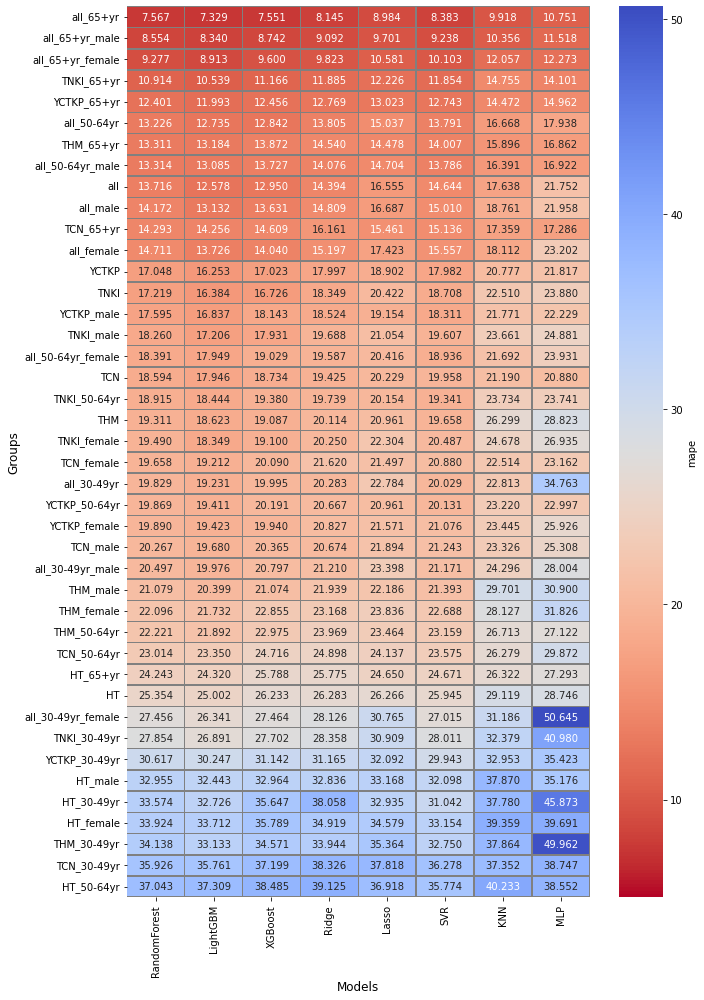

In [10]:
# 讀取6個CSV檔案
file_paths = [
    "RandomForest_mape.csv",
    "LightGBM_mape.csv",
    "XGBoost_mape.csv",
    "Ridge_mape.csv",
    "Lasso_mape.csv",
    "SVR_mape.csv",
    "KNN_mape.csv",
    "MLP_mape.csv"
]

# 模型名稱（可以修改為你的實際模型名稱）
model_names = ["RandomForest", "LightGBM", "XGBoost", "Ridge", "Lasso", "SVR", "KNN", "MLP"]

# 讀取所有檔案並合併
dfs = []
for i, file_path in enumerate(file_paths):
    df = pd.read_csv('./mape/'+file_path)
    df['model'] = model_names[i]
    dfs.append(df)

# 合併所有資料
all_data = pd.concat(dfs, ignore_index=True)

# 建立樞紐表：行是族群，列是模型
pivot_table = all_data.pivot(index='group', columns='model', values='mape')

# 確保模型順序正確
pivot_table = pivot_table[model_names]

pivot_table = pivot_table.sort_values(by='RandomForest', ascending=True)

# 只遮罩缺失值
mask = pivot_table.isna()


plt.figure(figsize=(10, 14))
sns.heatmap(pivot_table, 
            mask=mask,  
            cmap='coolwarm_r',
            vmin=5,  
            annot=True,
            fmt='.3f',
            cbar_kws={'label': 'mape'},
            linewidths=0.5,
            linecolor='gray')

#plt.title('Mape Heatmap Across Models and Groups', fontsize=16, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Groups', fontsize=12)
plt.tight_layout()

# 儲存高畫質圖片
plt.savefig(
    "mape_heatmap.png",   # 檔名
    dpi=300,                    # 畫質（300 為出版級）
    bbox_inches='tight',        # 自動裁切空白邊
    pad_inches=0.1              # 邊界留一點空間
)

plt.show()